In [1]:
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from pandas_profiling import ProfileReport

%matplotlib inline
import matplotlib
import seaborn as sns
%reload_ext autoreload
%autoreload 2

import datetime
from datetime import datetime
plt.style.use('fivethirtyeight')

import statsmodels.api as sm

In [18]:
# Important lib need to make CNN
import keras
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.layers import BatchNormalization,MaxPool1D
from keras.models import Sequential
from keras.layers import Conv1D,Dropout,Flatten,Dense
from tensorflow.keras.optimizers import Adam
from keras import layers
from keras import metrics


In [3]:
df = pd.read_csv('credit_card.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

# balancing data

In [6]:
N_frd = df[df['Class']==0]
frd = df[df['Class']==1]
frd.shape

(492, 31)

In [7]:
N_frd=N_frd.sample(frd.shape[0])
N_frd.shape

(492, 31)

In [8]:
data = frd.append(N_frd, ignore_index=True)
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,86698.0,0.109209,1.076905,-0.139848,0.424056,1.112550,-1.050928,1.482607,-0.372736,-0.605094,...,0.133401,0.579523,-0.277032,0.006816,0.229828,-0.566337,0.064633,0.034643,1.99,0
980,60102.0,0.701887,0.406505,-0.089665,1.093087,0.317469,0.006525,0.050999,0.102576,0.310657,...,0.112891,0.373223,0.263423,-0.825574,-0.758193,-0.375815,-0.117673,-0.148103,1.00,0
981,95706.0,2.024317,-0.123665,-0.758445,0.928087,0.118678,0.007327,-0.222683,-0.152101,2.399865,...,-0.527732,-0.853699,0.310932,0.582670,-0.110388,0.035110,-0.052519,-0.058175,0.01,0
982,167345.0,0.000014,0.786062,-1.342439,-0.165865,0.250660,-0.662706,0.884167,0.235790,-0.453346,...,0.418284,0.976190,0.108447,-0.572252,-0.183259,-0.144069,-0.112455,-0.052954,125.95,0


In [9]:
data['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [10]:
# creating data
x = data.drop('Class',axis=1)
y =  data['Class']

In [11]:
# spliting data

from sklearn.model_selection import train_test_split

# Setup random seed
np.random.seed(42)

# Create feature matrixs
x = data.drop('Class',axis=1)
y =  data['Class']

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [12]:
# scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [13]:
# convert Y dataset into array
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [14]:
# convert x dataset to 3D

x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)


In [15]:
x_train.shape ,y_train.shape

((787, 30, 1), (787,))

# CNN

In [34]:
epochs = 50
model = Sequential()

model.add(Conv1D(32, 2, activation = 'relu', input_shape = x_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
          
model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1,activation = 'sigmoid'))


In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 29, 32)            96        
                                                                 
 batch_normalization_3 (Batc  (None, 29, 32)           128       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 29, 32)            0         
                                                                 
 conv1d_3 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 batch_normalization_4 (Batc  (None, 28, 64)           256       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 28, 64)           

In [36]:
model.compile(optimizer = Adam(lr=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [37]:
history = model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
25/25 [==============================] - 2s 28ms/step - loss: 0.6356 - accuracy: 0.6849 - val_loss: 0.5819 - val_accuracy: 0.8325
Epoch 2/50
25/25 [==============================] - 0s 15ms/step - loss: 0.4010 - accuracy: 0.8272 - val_loss: 0.5226 - val_accuracy: 0.8376
Epoch 3/50
25/25 [==============================] - 0s 16ms/step - loss: 0.3632 - accuracy: 0.8729 - val_loss: 0.4783 - val_accuracy: 0.8579
Epoch 4/50
25/25 [==============================] - 0s 15ms/step - loss: 0.3530 - accuracy: 0.8767 - val_loss: 0.4337 - val_accuracy: 0.8782
Epoch 5/50
25/25 [==============================] - 0s 15ms/step - loss: 0.2965 - accuracy: 0.8933 - val_loss: 0.3923 - val_accuracy: 0.8985
Epoch 6/50
25/25 [==============================] - 0s 16ms/step - loss: 0.2862 - accuracy: 0.8983 - val_loss: 0.3551 - val_accuracy: 0.9086
Epoch 7/50
25/25 [==============================] - 0s 16ms/step - loss: 0.2655 - accuracy: 0.9123 - val_loss: 0.3204 - val_accuracy: 0.9188
Epoch 8/50
25

In [38]:
def plot_curve(history,epoch):
    epoch_range = range(1,epoch+1)
    
    #plot for accuracy
    plt.plot(epoch_range,history.history['accuracy'])
    plt.plot(epoch_range,history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Train','Validation'])
    plt.show()
    
    # plot for loss
    plt.plot(epoch_range,history.history['loss'])
    plt.plot(epoch_range,history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train','Validation'])
    plt.show()
    
    


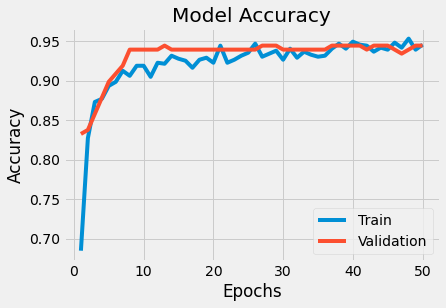

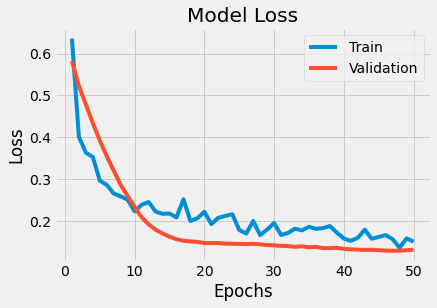

In [39]:
plot_curve(history,epochs)

Observation : After epochs=50 model accuracy increses and loss reduce